当第一次考试成绩为42时，最小可被接收的第二次成绩为 81.89528963471702
这个学生可以被接收！


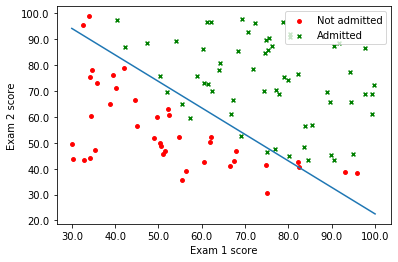

In [1]:
# 导入Matploylib库
from matplotlib import pyplot as plt
from numpy import *
import matplotlib.ticker as ticker
import numpy as np
import scipy.optimize as opt

# 定义h(x)预测函数:theat为转置后的矩阵
def hypothesis(theta, x):
    return np.dot(x, theta)

# 定义sigmoid函数
def sigmoid(theta, x):
    z = hypothesis(theta, x)
    return 1.0 / (1 + exp(-z))

# 定义代价函数
def cost(theta, X, y):
    return np.mean(-y * np.log(sigmoid(theta, X)) - (1 - y) * np.log(1 - sigmoid(theta, X)))

# 梯度下降函数
def gradient(theta, X, y):
    return (1 / len(X)) * X.T @ (sigmoid(theta, X) - y)

'''
绘图：绘制训练数据的散点图和h(x)预测函数对应的直线
'''
def draw():
    # 定义x y数据 x1 y1:未通过 x2 y2:通过
    x1 = []
    y1 = []
    x2 = []
    y2 = []

    # 导入训练数据
    train_data = open("ex2data1.txt")
    lines = train_data.readlines()
    for line in lines:
        scores = line.split(",")
        # 去除标记后面的换行符
        isQualified = scores[2].replace("\n", "")
        # 根据标记将两次成绩放到对应的数组
        if isQualified == "0":
            x1.append(float(scores[0]))
            y1.append(float(scores[1]))
        else:
            x2.append(float(scores[0]))
            y2.append(float(scores[1]))

    # 设置标题和横纵坐标的标注
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")

    # 设置通过测试和不通过测试数据的样式。其中x y为两次的成绩，marker:记号形状 color:颜色 s:点的大小 label:标注
    plt.scatter(x1, y1, marker='o', color='red', s=15, label='Not admitted')
    plt.scatter(x2, y2, marker='x', color='green', s=15, label='Admitted')

    # 标注[即上两行中的label]的显示位置：右上角
    plt.legend(loc='upper right')

    # 设置坐标轴上刻度的精度为一位小数。因训练数据中的分数的小数点太多，若不限制坐标轴上刻度显示的精度，影响最终散点图的美观度
    plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
    plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

    # 设置训练得到的模型对应的直线，即h(x)对应的直线
    # 设置x的取值范围：[30, 110]步长为10
    x = np.arange(30, 110, 10)
    y = (-result.x[0] - result.x[1] * x) / result.x[2]
    predict=(-result.x[0]-result.x[1]*42)/result.x[2]
    print("当第一次考试成绩为42时，最小可被接收的第二次成绩为",predict)
    if predict-85<0:
        print("这个学生可以被接收！")
    else:
        print("这个学生不能被接收！")
    plt.plot(x, y)

    # 显示
    plt.show()


'''
数据预先处理：将两次成绩与是否通过测试的标记分别生成矩阵，并将标记的矩阵转置。
'''
def init_data():
    # 两次成绩对应的特征矩阵
    data = []
    # 标记对应的矩阵
    label = []

    # 读取文件
    train_data = open("ex2data1.txt")
    lines = train_data.readlines()
    for line in lines:
        scores = line.split(",")
        # 去除标记后面的换行符
        isQualified = scores[2].replace("\n", "")
        # 添加特征x0，设置为1
        data.append([1, float(scores[0]), float(scores[1])])
        label.append(int(isQualified))

    # 标记矩阵转置，返回特征矩阵和标记矩阵
    return np.array(data), np.array(label).transpose()


'''
主函数
'''
if __name__ == '__main__':
    # 初始化数据
    X, y = init_data()
    # 初始化theta:三行一列的0矩阵
    theta = np.zeros((3, 1))
    # 使用minimize函数求解
    result = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient) #method求极值的方法 Newton-CG算法最小化一个或多个变量的标量函数。
    #minimize函数参数详解:https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
    #print(result)
    # 绘图
    draw()